<a href="https://colab.research.google.com/github/Yerraguntla-Rajesh/Machine-Learning/blob/main/company_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model  import Lasso

In [ ]:
# insert .csv dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Company_data.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.isnull().sum()
#displays the null values count

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
#to display information of columns and datatypes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# summary of the dataset
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#displaying mean of the columns of dataset
data.describe().loc['mean']

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
Name: mean, dtype: float64

<Axes: >

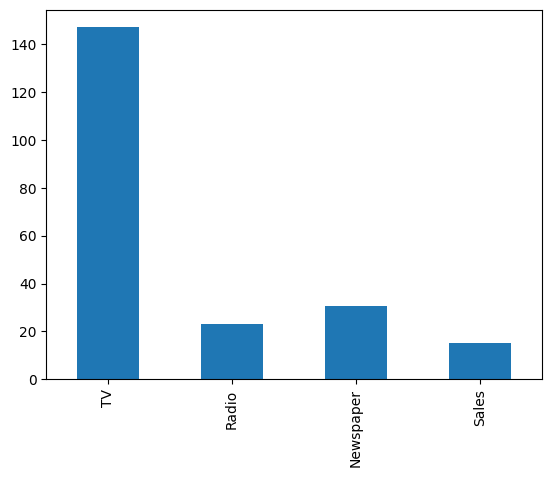

In [ ]:
#plotting the bar graph on mean
data.describe().loc['mean'].plot.bar()

In [ ]:
#Performing correlation dataset to to "r"
r=data.corr()
r


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

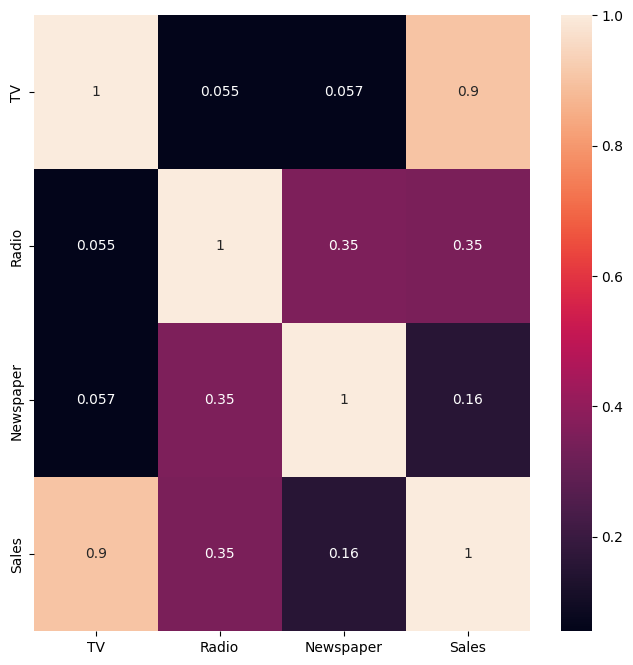

In [ ]:
#plotting heatmap graph
plt.figure(figsize=(8,8))
sns.heatmap(r, annot=True)


In [ ]:
# we taking x as "TV" and y as "Sales"
x=data['TV'].values
y=data['Sales'].values
x.shape,y.shape

In [ ]:
#reshaping the x and y
x=x.reshape(-1,1)
y=y.reshape(-1,1)
x.shape,y.shape

((200, 1), (200, 1))

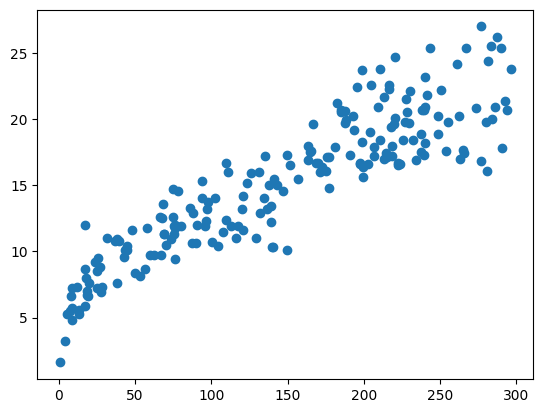

In [ ]:
# performing scatter plot
plt.scatter(x,y)


In [ ]:
#Fitting Linear regression
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [ ]:
#Performing the metrics on model
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(x)
print('MAE = ',mean_absolute_error(y, y_pred))
print('MSE = ',mean_squared_error(y, y_pred))
print('RMSE = ',np.sqrt(mean_squared_error(y, y_pred)))
print('R_2 = ',r2_score(y, y_pred))

MAE =  1.8305872641932412
MSE =  5.2177438977951285
RMSE =  2.2842381438447106
R_2 =  0.8121757029987414


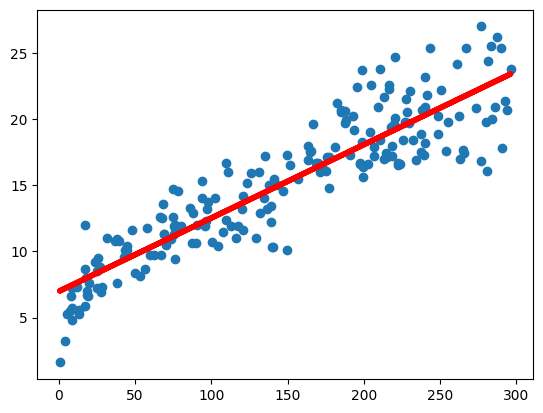

In [ ]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red' , linewidth=4)

In [ ]:
#Splitting the model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=11)

In [ ]:
xtrain.shape,xtest.shape

((160, 1), (40, 1))

In [ ]:
#fitting the lasso regression
reg = Lasso(alpha = 100)
reg.fit(xtrain, ytrain)

Lasso(alpha=100)

In [ ]:
#Evaluating the model on training data
p=reg.predict(xtrain)

In [ ]:
#Performing the metrics on model
print('MAE = ',mean_absolute_error(ytrain, p))
print('MSE = ',mean_squared_error(ytrain, p))
print('RMSE = ',np.sqrt(mean_squared_error(ytrain, p)))
print('R_2 = ',r2_score(ytrain, p))

MAE =  1.924563879496597
MSE =  6.117038194303587
RMSE =  2.473264683430301
R_2 =  0.7687658781329048


In [ ]:
#Evaluating the model on testing data
q=reg.predict(xtest)

In [ ]:
#Performing the metrics on model
print('MAE = ',mean_absolute_error(ytest, q))
print('MSE = ',mean_squared_error(ytest, q))
print('RMSE = ',np.sqrt(mean_squared_error(ytest, q)))
print('R_2 = ',r2_score(ytest, q))

MAE =  2.536147374754915
MSE =  9.721023909289187
RMSE =  3.117855658828546
R_2 =  0.7053426545492749


In [ ]:
#Fitting ridge regression
from sklearn.linear_model import Ridge
reg2=Ridge(alpha=0.5)
reg2.fit(xtrain,ytrain)

Ridge(alpha=0.5)

In [ ]:
#Evaluating the model on training data
p1=reg2.predict(xtrain)

In [ ]:
#Performing the metrics on model
print('MAE = ',mean_absolute_error(ytrain, p1))
print('MSE = ',mean_squared_error(ytrain, p1))
print('RMSE = ',np.sqrt(mean_squared_error(ytrain, p1)))
print('R_2 = ',r2_score(ytrain, p1))

MAE =  1.7295631649674394
MSE =  4.767244441105694
RMSE =  2.183402033777951
R_2 =  0.8197903058556321


In [ ]:
#Evaluating the model on testing data
q1=reg2.predict(xtest)

In [ ]:
#Performing the metrics on model
print('MAE = ',mean_absolute_error(ytest, q1))
print('MSE = ',mean_squared_error(ytest, q1))
print('RMSE = ',np.sqrt(mean_squared_error(ytest, q1)))
print('R_2 = ',r2_score(ytest, q1))

MAE =  2.2511239799286007
MSE =  7.106865509151456
RMSE =  2.6658704974457135
R_2 =  0.7845813213769777
